Trong notebook này, ta sẽ:
 - Làm quen với thư viện sklearn dùng cho học máy
 - Làm quen với một số kỹ thuật phổ biến cho học máy có giám sát

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/COLE/Khóa cơ bản - không gửi học viên/Week_2/Thực hành trên lớp

/content/drive/MyDrive/COLE/Khóa cơ bản - không gửi học viên/Week_2/Thực hành trên lớp


Học có giám sát (supervised learning) chia làm hai loại chính: Regression (hồi quy), và Classification (phân loại).

In [3]:
# Ta load những thư viện cần sử dụng

import os
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# Dưới đây là các phép đo lỗi phổ biến cho bài toán regression
# các phép đo error này nếu giá trị càng nhỏ tức là mô hình càng fit tốt với dữ liệu
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Các phép đo phổ biến cho bài toán classification
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# Phần 1: Bài toán Regression

In [4]:
os.listdir("data")

['montreal_housing.csv',
 'Boston.csv',
 'final_dataDec.csv',
 'autompg.csv',
 'Data Dictionary.xls',
 'auto-mpg.csv',
 'sampleEntry.csv',
 'cs-test.csv',
 'cs-training.csv',
 'housing.csv',
 'iris.csv',
 'Fish.csv',
 'test_fish.csv',
 'train_fish.csv']

In [5]:
# Đọc dữ liệu giá bất động sản montreal
# Mục tiêu: Dự đoán giá bán (ask price) của các ngôi nhà dựa trên 39 tham số
# Ta dùng thư viện pandas để đọc bảng csv với hàm read_csv

df_montreal = pd.read_csv("data/montreal_housing.csv")

In [6]:
# Kiểm tra kích thước dữ liệu bằng câu lệnh sau
df_montreal.shape

(9717, 40)

Kết quả cho thấy dataframe có 9717 hàng và 40 cột

In [7]:
# Sựu dụng phương thức .head() để view bảng dữ liệu, hay còn gọi là dataframe
df_montreal.head()

,not_sold,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,emergency_shelters,emergency_water,Facilities,fire_stations,Cultural,Monuments,police_stations,Vacant,Free_Parking,askprice
0,1,0,0,0,0,0,0,0,0,0,...,37,274,210,43,71,43,25,43,52,166000
1,1,0,0,0,0,0,0,0,0,0,...,19,120,1,15,24,5,7,0,4,349000
2,1,0,0,0,0,0,0,0,0,0,...,27,191,155,28,54,32,18,19,43,224900
3,1,0,0,0,0,0,0,0,0,0,...,10,82,0,13,10,2,5,0,1,585000
4,1,0,0,0,0,0,0,0,0,0,...,30,238,216,37,66,42,20,43,52,312900


In [8]:
# Tách dataframe thành hai phần x và y (đầu vào và đầu ra của mô hình học máy)

x = df_montreal.iloc[:, :-1]
y = df_montreal["askprice"]

Trong một project học máy, dữ liệu bao giờ cũng sẽ được chia làm ít nhất hai phần:
 - Phần thứ nhất dùng để huấn luyện mô hình (training data)
 - Phần thứ hai dùng để kiểm tra hiệu năng của mô hình với các hàm đo performance (testing data)

So sánh kết quả performance trên training và testing data sẽ cho ta biết:
 - Mô hình có đang fit tốt hay không
 - Có bị mắc các lỗi như overfit, underfit hay không.

Từ đó, ta sẽ có phương án huấn luyện tốt hơn

In [9]:
# Tách dữ liệu thành training và testing set bằng hàm train_test_split của thư viện sklearn
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7287, 39)
(2430, 39)
(7287,)
(2430,)


In [11]:

# Để huấn luyện mô hình Linear Regression, ta dùng class Linear Regression đã import ở phía trên
# linear_reg = LinearRegression(normalize= True)
linear_reg = LinearRegression()

# Sử dụng phương thức ".fit" để training
linear_reg.fit(x_train, y_train)

LinearRegression()

Sử dụng độ đo mean_squared_error để kiểm tra hiệu năng mô hình

In [12]:
# Testing models
y_pred_train = linear_reg.predict(x_train)
y_pred = linear_reg.predict(x_test)

print(f"MSE on training: {mean_squared_error(y_train,y_pred_train):.3f}, on testing: {mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE on training: {mean_absolute_error(y_train, y_pred_train):.3f}, on testing: {mean_absolute_error(y_test, y_pred):.3f}")

MSE on training: 8035677593.552, on testing: 19582142084209633103183872.000
MAE on training: 67951.409, on testing: 89769188173.978


Sử dụng Linear Regression không tốt cho trường hợp này lắm => Thử những mô hình cao cấp hơn

Ta sẽ sử dụng hai mô hình nâng cao của Linear Regression là Ridge và Lasso, hai mô hình này có thêm tham số chuẩn hóa giúp mô hình bớt bị overfit hơn

Ban chưa cần quan tâm đến lý thuyết của hai mô hình này vội, vì chúng sẽ được dạy ở buổi 4

In [13]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [14]:
# Testing models
y_pred_train = ridge.predict(x_train)
y_pred = ridge.predict(x_test)

print(f"MSE on training: {mean_squared_error(y_train, y_pred_train):.3f}, on testing: {mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE on training: {mean_absolute_error(y_train, y_pred_train):.3f}, on testing: {mean_absolute_error(y_test, y_pred):.3f}")

MSE on training: 8035677546.443, on testing: 8098068300.710
MAE on training: 67951.202, on testing: 69416.103


Ta thấy model đã giảm lỗi MSE, tuy nhiên vẫn khá cao.

In [17]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [18]:
# Testing models
y_pred_train = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

print(f"MSE on training: {mean_squared_error(y_train, y_pred_train):.3f}, on testing: {mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE on training: {mean_absolute_error(y_train, y_pred_train):.3f}, on testing: {mean_absolute_error(y_test, y_pred):.3f}")

MSE on training: 8036103924.474, on testing: 8098806558.010
MAE on training: 67956.828, on testing: 69409.914


Ta có thể thấy với hồi quy Lasso và Ridge, model đã bớt bị overfit hơn rất nhiều. Tuy nhiên, độ chính xác của hai mô hình này phụ thuộc vào giá trị của tham số alpha

# Phần 2: Bài toán Classification

In [20]:
df_iris = pd.read_csv("data/iris.csv")

In [21]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_iris.shape

(150, 5)

## Mục tiêu: Dự đoán loài hoa dựa vào 4 thông số từ sepal length đến petal width

### Nhận xét: dữ liệu có kích thước khá nhỏ nên tiến hành evaluation bằng cross validation

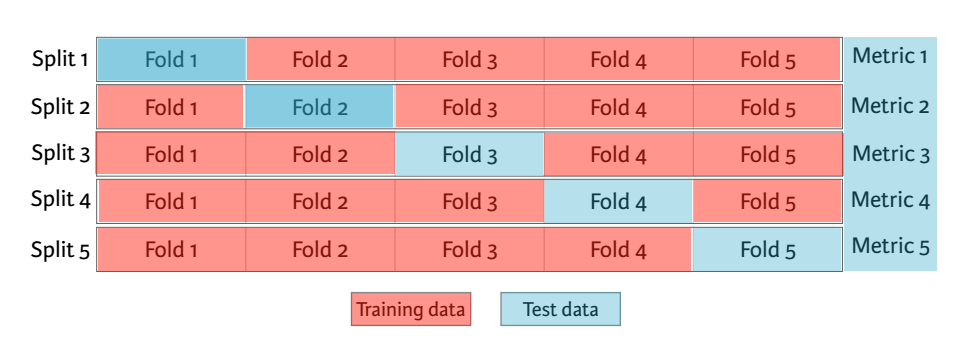

In [22]:
from IPython.display import Image
Image('cross-validation.png')

Giải thích cross_validation:
    Ta chia dữ liệu ra làm n phần và tiến hành training n lần
    - Với mỗi một lần training ta lấy một phần trong n dataset nhỏ làm testing data, và (n-1) còn lại làm training data
    - Lần lượt huấn luyện cho đến khi cả n dataset nhỏ đều được dùng để làm test
    - Kết quả đo performance cuối cùng sẽ là trung bình của n lần đo performance trên các dataset nhỏ

In [23]:
x = df_iris.iloc[:, :-1]
y = df_iris["Species"]

In [24]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encode = LabelEncoder()
y_new = label_encode.fit_transform(y)

In [27]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
label_encode.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
from sklearn.model_selection import cross_validate

# scoring = {'precision': make_scorer(accuracy_score),
#             'f1': make_scorer(f1_score)}
scoring = ['precision_macro', 'recall_macro']

clf = LogisticRegression()

# Khi ta chạy hàm cross_calidate, kết quả trả về sẽ là một dictionary lưu trữ thông tin của quá trình huấn luyện
scores = cross_validate(clf, x, y_new, scoring=scoring, cv=5, return_train_score=True, return_estimator = True)

In [30]:
sorted(scores.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_precision_macro',
 'test_recall_macro',
 'train_precision_macro',
 'train_recall_macro']

Trong đó:
- estimator là tham số của các mô hình đã được huấn luyện
- fit_time, score_time là thời gian huấn luyện và đánh giá cho mỗi lần validation
- test/train_<tên độ đo> là kết quả đo của độ đo performance trên tập train và test cho mỗi lần validation

In [31]:
print(scores['train_precision_macro'])
print(scores['test_precision_macro'])

[0.98333333 1.         1.         1.         1.        ]
[0.9047619 1.        1.        1.        0.8627451]


In [ ]:
# Mỗi giá trị test/train_precision_macro là một mảng numpy, ta có thể dùng phương thức ndarray.mean() để tìm độ
# chính xác trung bình
print(scores['train_precision_macro'].mean())
print(scores['test_precision_macro'].mean())

0.9754980478087025
0.9767676767676768


In [32]:
# Kiểm tra độ đo recall trên train và test

print(scores['train_recall_macro'])
print(scores['test_recall_macro'])

[0.98333333 1.         1.         1.         1.        ]
[0.86666667 1.         1.         1.         0.76666667]


In [33]:
print(scores['train_recall_macro'].mean())
print(scores['test_recall_macro'].mean())

0.9966666666666667
0.9266666666666665


In [37]:
# Gõ key estimator để  truy xuất ra các mô hình trong quá trình cross val
# Mỗi mô hình sau khi được huấn luyện xong sẽ được ký hiệu là một object như sau
scores["estimator"][4]

LogisticRegression()

In [38]:
# Gõ coeff_ để truy xuất ra trọng số của mỗi LogisticRegression object như sau
scores["estimator"][0].coef_

array([[-0.116866  ,  1.35467063,  1.68499157, -1.56508842, -0.74343385],
       [-0.06881691,  0.67943161, -0.3611237 ,  0.67075428, -0.57794445],
       [ 0.1856829 , -2.03410225, -1.32386787,  0.89433414,  1.3213783 ]])

**Key takeaway:**

- Training và testing là hai phần không thể tách rời trong một project machine learning
- Ta có thể sử dụng thư viện sklearn để áp dụng các mô hình học máy và các kỹ thuật xử lý số liệu cho machine learning
- Các model học máy được lưu trữ dưới dạng các class trong thư viện sklearn
- Để tiến hành huấn luyện mô hình, ta khởi tạo một biến với class là tên mô hình đó (ví dụ LinearRegression, Logistic Regression) và sử dụng phương thức ".fit"
- Mỗi một loại bài toán sẽ có những độ đo phù hợp, ta có thể tìm implementation của các độ đo đó tại sub-package sklearn.metrics

Để hiểu thêm về cách sử dụng thư viện sklearn, ta có thể xem trang web của sklearn [tại đậy](https://scikit-learn.org/stable/index.html)

Sách tham khảo về học máy với sklearn: [scikit-learn Cookbook](https://github.com/whoafridi/Machine-Learning-Books/blob/master/book/scikit-learn%20Cookbook%20-%20Second%20Edition.pdf)